### Importando as bibliotecas que serão usadas

In [200]:
import pandas as pd
import numpy as np
from statistics import multimode
import warnings

warnings.filterwarnings('ignore')


### Importando os datasets que serão usados
- movies -> data set com dados dos filmes
- names -> data set com dados dos atores
- ratings -> data set com dados das avaliações dos filmes

In [201]:
movies = pd.read_csv('IMDb_movies.csv')
names = pd.read_csv('IMDb_names.csv')
ratings = pd.read_csv('IMDb_ratings.csv')

### Exibindo os 3 datasets para verificar como está cada um

In [5]:
pd.set_option('display.max_columns',300)

display(movies.head(),names.head(),ratings.head())

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,writer,production_company,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,NaN,Charles Tait,Charles Tait,J. and N. Tait,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,537,$ 2250,NaN,NaN,NaN,7.0,7.0
1,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,"Urban Gad, Gebhard Schätzler-Perasini",Fotorama,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.9,171,NaN,NaN,NaN,NaN,4.0,2.0
2,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,Victorien Sardou,Helen Gardner Picture Players,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,420,$ 45000,NaN,NaN,NaN,24.0,3.0
3,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",Dante Alighieri,Milano Film,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2019,NaN,NaN,NaN,NaN,28.0,14.0
4,tt0002199,"From the Manger to the Cross; or, Jesus of Naz...","From the Manger to the Cross; or, Jesus of Naz...",1912,1913,"Biography, Drama",60,USA,English,Sidney Olcott,Gene Gauntier,Kalem Company,"R. Henderson Bland, Percy Dyer, Gene Gauntier,...","An account of the life of Jesus Christ, based ...",5.7,438,NaN,NaN,NaN,NaN,12.0,5.0


,imdb_name_id,name,birth_name,height,bio,birth_details,birth_year,date_of_birth,place_of_birth,death_details,death_year,date_of_death,place_of_death,reason_of_death,spouses,divorces,spouses_with_children,children,primary_profession,known_for_titles
0,nm0000001,Fred Astaire,Frederic Austerlitz Jr.,177.0,"Fred Astaire was born in Omaha, Nebraska, to J...","May 10, 1899 in Omaha, Nebraska, USA",1899.0,1899-05-10,"Omaha, Nebraska, USA","June 22, 1987 in Los Angeles, California, USA ...",1987.0,1987-06-22,"Los Angeles, California, USA",pneumonia,2,0,1,2,"soundtrack,actor,miscellaneous","tt0050419,tt0053137,tt0072308,tt0043044"
1,nm0000002,Lauren Bacall,Betty Joan Perske,174.0,Lauren Bacall was born Betty Joan Perske on Se...,"September 16, 1924 in The Bronx, New York City...",1924.0,1924-09-16,"The Bronx, New York City, New York, USA","August 12, 2014 in New York City, New York, US...",2014.0,2014-08-12,"New York City, New York, USA",stroke,2,1,2,3,"actress,soundtrack","tt0037382,tt0038355,tt0117057,tt0071877"
2,nm0000003,Brigitte Bardot,Brigitte Bardot,166.0,"Brigitte Bardot was born on September 28, 1934...","September 28, 1934 in Paris, France",1934.0,1934-09-28,"Paris, France",NaN,NaN,NaN,NaN,NaN,4,3,1,1,"actress,soundtrack,producer","tt0054452,tt0059956,tt0057345,tt0049189"
3,nm0000004,John Belushi,John Adam Belushi,173.0,"John Belushi was born in Chicago, Illinois, US...","January 24, 1949 in Chicago, Illinois, USA",1949.0,1949-01-24,"Chicago, Illinois, USA","March 5, 1982 in Hollywood, Los Angeles, Calif...",1982.0,1982-03-05,"Hollywood, Los Angeles, California, USA",acute cocaine and heroin intoxication,1,0,0,0,"actor,writer,soundtrack","tt0078723,tt0072562,tt0080455,tt0077975"
4,nm0000005,Ingmar Bergman,Ernst Ingmar Bergman,179.0,"Ernst Ingmar Bergman was born July 14, 1918, t...","July 14, 1918 in Uppsala, Uppsala län, Sweden",1918.0,1918-07-14,"Uppsala, Uppsala län, Sweden","July 30, 2007 in Fårö, Gotlands län, Sweden",2007.0,2007-07-30,"Fårö, Gotlands län, Sweden",NaN,5,4,5,8,"writer,director,actor","tt0050976,tt0083922,tt0069467,tt0050986"


,imdb_title_id,weighted_average_vote,total_votes,mean_vote,median_vote,votes_10,votes_9,votes_8,votes_7,votes_6,votes_5,votes_4,votes_3,votes_2,votes_1,allgenders_0age_avg_vote,allgenders_0age_votes,allgenders_18age_avg_vote,allgenders_18age_votes,allgenders_30age_avg_vote,allgenders_30age_votes,allgenders_45age_avg_vote,allgenders_45age_votes,males_allages_avg_vote,males_allages_votes,males_0age_avg_vote,males_0age_votes,males_18age_avg_vote,males_18age_votes,males_30age_avg_vote,males_30age_votes,males_45age_avg_vote,males_45age_votes,females_allages_avg_vote,females_allages_votes,females_0age_avg_vote,females_0age_votes,females_18age_avg_vote,females_18age_votes,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
0,tt0000574,6.1,537,6.3,6.0,54,17,55,121,122,98,25,18,12,15,6.0,1.0,6.2,126.0,5.9,209.0,6.4,100.0,6.1,393.0,6.0,1.0,6.2,112.0,5.9,186.0,6.4,85.0,6.1,48.0,NaN,NaN,5.7,14.0,6.0,19.0,6.6,14.0,6.3,64.0,6.0,89.0,6.2,309.0
1,tt0001892,5.9,171,6.1,6.0,5,6,17,41,52,24,14,5,4,3,NaN,NaN,5.7,25.0,6.0,60.0,6.3,58.0,6.0,131.0,NaN,NaN,5.8,21.0,6.0,56.0,6.3,50.0,5.7,16.0,NaN,NaN,5.8,4.0,5.8,4.0,6.5,8.0,5.9,29.0,6.2,27.0,6.0,114.0
2,tt0002101,5.2,420,5.2,5.0,12,8,16,60,89,111,58,26,24,16,NaN,NaN,4.6,24.0,5.1,104.0,5.3,180.0,5.0,278.0,NaN,NaN,4.6,20.0,5.1,89.0,5.2,159.0,5.8,39.0,NaN,NaN,4.5,4.0,5.5,14.0,6.2,20.0,4.9,57.0,5.5,197.0,4.7,103.0
3,tt0002130,7.0,2019,6.9,7.0,194,208,386,571,308,153,59,37,19,84,7.0,2.0,7.0,429.0,7.0,783.0,7.1,430.0,7.0,1464.0,8.0,1.0,7.0,371.0,7.0,701.0,7.0,346.0,7.2,205.0,6.0,1.0,6.8,53.0,7.3,74.0,7.4,75.0,7.0,126.0,7.1,452.0,7.0,1076.0
4,tt0002199,5.7,438,5.8,6.0,28,15,42,75,114,70,28,18,15,33,NaN,NaN,5.7,38.0,5.6,156.0,5.9,147.0,5.8,318.0,NaN,NaN,5.8,34.0,5.7,142.0,5.8,131.0,5.4,29.0,NaN,NaN,5.0,4.0,4.8,10.0,6.5,15.0,5.7,56.0,5.9,161.0,5.7,164.0


### Analisando os dados de cada dataset

### Colunas bugget, usa_gross_income e worlwide_gross_income estão como objetos e para ser trabalhadas teriam que ser alteradas para int32 ou float64


In [6]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81273 entries, 0 to 81272
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_title_id          81273 non-null  object 
 1   title                  81273 non-null  object 
 2   original_title         81273 non-null  object 
 3   year                   81273 non-null  int64  
 4   date_published         81273 non-null  object 
 5   genre                  81273 non-null  object 
 6   duration               81273 non-null  int64  
 7   country                81234 non-null  object 
 8   language               80518 non-null  object 
 9   director               81200 non-null  object 
 10  writer                 79780 non-null  object 
 11  production_company     76948 non-null  object 
 12  actors                 81207 non-null  object 
 13  description            78843 non-null  object 
 14  avg_vote               81273 non-null  float64
 15  vo

In [7]:
movies.describe()

,year,duration,avg_vote,votes,metascore,reviews_from_users,reviews_from_critics
count,81273.000000,81273.000000,81273.000000,8.127300e+04,12722.000000,74196.000000,70286.000000
mean,1993.007210,100.565981,5.926587,9.421771e+03,55.762695,43.753194,27.992758
std,23.992284,25.320189,1.243315,5.220245e+04,17.757453,159.903568,58.708764
min,1906.000000,40.000000,1.000000,9.900000e+01,1.000000,1.000000,1.000000
25%,1979.000000,88.000000,5.200000,2.060000e+02,43.000000,4.000000,3.000000
50%,2002.000000,96.000000,6.100000,4.950000e+02,56.000000,9.000000,8.000000
75%,2012.000000,108.000000,6.800000,1.865000e+03,69.000000,26.000000,24.000000
max,2019.000000,3360.000000,10.000000,2.159628e+06,100.000000,8302.000000,987.000000


### Dessa forma é possível verificar o % de missings por coluna e podemos ver que em bugget, usa_gross_income e worlwide_gross_income e revoew_from_critics esse % é elevado


In [8]:
movies.isna().mean()*100

imdb_title_id             0.000000
title                     0.000000
original_title            0.000000
year                      0.000000
date_published            0.000000
genre                     0.000000
duration                  0.000000
country                   0.047986
language                  0.928968
director                  0.089821
writer                    1.837018
production_company        5.321571
actors                    0.081208
description               2.989923
avg_vote                  0.000000
votes                     0.000000
budget                   71.941481
usa_gross_income         81.428027
worlwide_gross_income    63.220258
metascore                84.346585
reviews_from_users        8.707689
reviews_from_critics     13.518635
dtype: float64

### Data set movies não apresenta linhas duplicadas


In [9]:
movies[movies.duplicated()]

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,writer,production_company,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics


In [10]:
names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175715 entries, 0 to 175714
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   imdb_name_id           175715 non-null  object 
 1   name                   175715 non-null  object 
 2   birth_name             175715 non-null  object 
 3   height                 30080 non-null   float64
 4   bio                    122832 non-null  object 
 5   birth_details          75229 non-null   object 
 6   birth_year             75111 non-null   float64
 7   date_of_birth          75102 non-null   object 
 8   place_of_birth         71122 non-null   object 
 9   death_details          26862 non-null   object 
 10  death_year             26838 non-null   float64
 11  date_of_death          26855 non-null   object 
 12  place_of_death         25036 non-null   object 
 13  reason_of_death        11972 non-null   object 
 14  spouses                175715 non-nu

In [11]:
names.describe()

,height,birth_year,death_year,spouses,divorces,spouses_with_children,children
count,30080.00000,75111.000000,26838.000000,175715.000000,175715.000000,175715.000000,175715.000000
mean,159.40482,1947.189480,1987.813362,0.254554,0.090829,0.128452,0.239376
std,52.51747,34.460445,39.526456,0.630236,0.394182,0.386184,0.790671
min,76.00000,46.000000,17.000000,0.000000,0.000000,0.000000,0.000000
25%,94.00000,1928.000000,1975.000000,0.000000,0.000000,0.000000,0.000000
50%,200.00000,1953.000000,1994.000000,0.000000,0.000000,0.000000,0.000000
75%,200.00000,1971.000000,2008.000000,0.000000,0.000000,0.000000,0.000000
max,220.00000,2010.000000,2019.000000,12.000000,12.000000,6.000000,16.000000


### Dessa forma é possível verificar o % de missings por coluna e podemos ver em algumas esse percentual é bem elevado! Nessas colunas análises serão evitadas


In [12]:
names.isna().mean()*100

imdb_name_id              0.000000
name                      0.000000
birth_name                0.000000
height                   82.881370
bio                      30.095894
birth_details            57.186922
birth_year               57.254076
date_of_birth            57.259198
place_of_birth           59.524230
death_details            84.712745
death_year               84.726404
date_of_death            84.716729
place_of_death           85.751928
reason_of_death          93.186694
spouses                   0.000000
divorces                  0.000000
spouses_with_children     0.000000
children                  0.000000
primary_profession        0.212845
known_for_titles          0.550323
dtype: float64

### Também não existam duplicatas nesse dataset


In [13]:
names[names.duplicated()]

,imdb_name_id,name,birth_name,height,bio,birth_details,birth_year,date_of_birth,place_of_birth,death_details,death_year,date_of_death,place_of_death,reason_of_death,spouses,divorces,spouses_with_children,children,primary_profession,known_for_titles


In [14]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81273 entries, 0 to 81272
Data columns (total 49 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   imdb_title_id              81273 non-null  object 
 1   weighted_average_vote      81273 non-null  float64
 2   total_votes                81273 non-null  int64  
 3   mean_vote                  81273 non-null  float64
 4   median_vote                81273 non-null  float64
 5   votes_10                   81273 non-null  int64  
 6   votes_9                    81273 non-null  int64  
 7   votes_8                    81273 non-null  int64  
 8   votes_7                    81273 non-null  int64  
 9   votes_6                    81273 non-null  int64  
 10  votes_5                    81273 non-null  int64  
 11  votes_4                    81273 non-null  int64  
 12  votes_3                    81273 non-null  int64  
 13  votes_2                    81273 non-null  int

In [15]:
ratings.describe()

,weighted_average_vote,total_votes,mean_vote,median_vote,votes_10,votes_9,votes_8,votes_7,votes_6,votes_5,votes_4,votes_3,votes_2,votes_1,allgenders_0age_avg_vote,allgenders_0age_votes,allgenders_18age_avg_vote,allgenders_18age_votes,allgenders_30age_avg_vote,allgenders_30age_votes,allgenders_45age_avg_vote,allgenders_45age_votes,males_allages_avg_vote,males_allages_votes,males_0age_avg_vote,males_0age_votes,males_18age_avg_vote,males_18age_votes,males_30age_avg_vote,males_30age_votes,males_45age_avg_vote,males_45age_votes,females_allages_avg_vote,females_allages_votes,females_0age_avg_vote,females_0age_votes,females_18age_avg_vote,females_18age_votes,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
count,81273.000000,8.127300e+04,81273.000000,81273.000000,8.127300e+04,81273.000000,81273.000000,81273.000000,81273.000000,81273.000000,81273.000000,81273.000000,81273.000000,81273.000000,26543.000000,26543.000000,80858.000000,80858.000000,81264.000000,81264.000000,81160.000000,81160.000000,81272.000000,8.127200e+04,20339.000000,20339.000000,80217.000000,80217.000000,81264.000000,81264.000000,81120.000000,81120.000000,81203.000000,81203.000000,15333.000000,15333.000000,76239.000000,76239.000000,80409.000000,80409.000000,78701.000000,78701.000000,80667.000000,80667.000000,81034.000000,81034.000000,81269.000000,81269.000000
mean,5.926587,9.421771e+03,6.259578,6.304055,1.222871e+03,1192.843527,2019.657365,2076.640545,1335.426156,694.539355,339.237151,191.978824,126.626801,221.950353,6.594036,23.130505,6.039700,2113.706659,5.883599,3862.679932,5.692160,1175.402600,5.848761,6.066614e+03,6.575992,20.700821,5.995359,1603.891881,5.839554,3187.461939,5.638010,978.644206,6.063094,1380.995862,6.852136,8.603796,6.264041,521.021629,6.103064,635.330672,6.064022,184.702024,5.139347,77.299974,5.967583,1676.121468,5.775737,4371.879487
std,1.243315,5.220245e+04,1.161615,1.492902,1.221412e+04,11427.311637,13386.328821,10384.089767,5818.537290,2868.639078,1390.909271,801.072401,543.815589,1154.377963,2.106354,109.069456,1.461469,13706.993463,1.290564,20411.689507,1.267205,4859.557481,1.255688,3.335494e+04,2.081662,87.729439,1.491354,10667.325419,1.300660,17051.328359,1.283857,4047.900093,1.350090,7622.055845,2.168274,26.441366,1.750528,3245.151199,1.452682,3350.118823,1.542429,771.842552,1.315429,127.173472,1.322301,8450.086745,1.295955,23093.245801
min,1.000000,9.900000e+01,1.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,5.200000,2.060000e+02,5.600000,6.000000,2.200000e+01,9.000000,18.000000,29.000000,30.000000,22.000000,12.000000,7.000000,5.000000,10.000000,5.500000,1.000000,5.300000,16.000000,5.200000,70.000000,5.000000,51.000000,5.100000,1.340000e+02,5.500000,1.000000,5.200000,11.000000,5.100000,57.000000,4.900000,43.000000,5.400000,23.000000,5.900000,1.000000,5.400000,4.000000,5.300000,10.000000,5.300000,6.000000,4.300000,12.000000,5.200000,24.000000,5.100000,97.000000
50%,6.100000,4.950000e+02,6.400000,7.000000,5.400000e+01,25.000000,52.000000,79.000000,76.000000,52.000000,31.000000,19.000000,14.000000,25.000000,7.000000,2.000000,6.300000,52.000000,6.100000,177.000000,5.900000,120.000000,6.100000,3.200000e+02,7.000000,2.000000,6.200000,38.000000,6.000000,145.000000,5.900000,101.000000,6.300000,61.000000,7.000000,1.000000,6.500000,14.000000,6.300000,27.000000,6.300000,16.000000,5.300000,28.000000,6.200000,84.500000,6.000000,233.000000
75%,6.800000,1.865000e+03,7.100000,7.000000,2.050000e+02,120.000000,250.000000,357.000000,2

### Apesar de algumas colunas terem muitos missings isso não é um problema porque são colunas em que eram esperados missings já que nem todas as idades votam em todos os filmes


In [16]:
ratings.isna().mean()*100

imdb_title_id                 0.000000
weighted_average_vote         0.000000
total_votes                   0.000000
mean_vote                     0.000000
median_vote                   0.000000
votes_10                      0.000000
votes_9                       0.000000
votes_8                       0.000000
votes_7                       0.000000
votes_6                       0.000000
votes_5                       0.000000
votes_4                       0.000000
votes_3                       0.000000
votes_2                       0.000000
votes_1                       0.000000
allgenders_0age_avg_vote     67.340937
allgenders_0age_votes        67.340937
allgenders_18age_avg_vote     0.510625
allgenders_18age_votes        0.510625
allgenders_30age_avg_vote     0.011074
allgenders_30age_votes        0.011074
allgenders_45age_avg_vote     0.139038
allgenders_45age_votes        0.139038
males_allages_avg_vote        0.001230
males_allages_votes           0.001230
males_0age_avg_vote      

### Também não existam duplicatas nesse dataset


In [17]:
ratings[ratings.duplicated()]

,imdb_title_id,weighted_average_vote,total_votes,mean_vote,median_vote,votes_10,votes_9,votes_8,votes_7,votes_6,votes_5,votes_4,votes_3,votes_2,votes_1,allgenders_0age_avg_vote,allgenders_0age_votes,allgenders_18age_avg_vote,allgenders_18age_votes,allgenders_30age_avg_vote,allgenders_30age_votes,allgenders_45age_avg_vote,allgenders_45age_votes,males_allages_avg_vote,males_allages_votes,males_0age_avg_vote,males_0age_votes,males_18age_avg_vote,males_18age_votes,males_30age_avg_vote,males_30age_votes,males_45age_avg_vote,males_45age_votes,females_allages_avg_vote,females_allages_votes,females_0age_avg_vote,females_0age_votes,females_18age_avg_vote,females_18age_votes,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes


# Análise 1
## Dado o nome de um filme, mostre seus principais atores, a média das suas notas e o seu gênero



### Reduzindo o data set movies para apenas algumas colunas

In [18]:
movies_reduced = movies[['imdb_title_id','title','actors','genre',]]
movies_reduced.head()

,imdb_title_id,title,actors,genre
0,tt0000574,The Story of the Kelly Gang,"Elizabeth Tait, John Tait, Norman Campbell, Be...","Biography, Crime, Drama"
1,tt0001892,Den sorte drøm,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Drama
2,tt0002101,Cleopatra,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...","Drama, History"
3,tt0002130,L'Inferno,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...","Adventure, Drama, Fantasy"
4,tt0002199,"From the Manger to the Cross; or, Jesus of Naz...","R. Henderson Bland, Percy Dyer, Gene Gauntier,...","Biography, Drama"


### Reduzindo o data set ratings para apenas algumas colunas

In [19]:
ratings_reduced = ratings[['imdb_title_id','median_vote']]
ratings_reduced.head()

,imdb_title_id,median_vote
0,tt0000574,6.0
1,tt0001892,6.0
2,tt0002101,5.0
3,tt0002130,7.0
4,tt0002199,6.0


### Fazendo um merge dos data sets "movies" e "ratings" usando o datset "movies" como o dataset âncora e chamando de a1 (análises 1)

In [20]:
a1= pd.merge(movies_reduced,ratings_reduced,'left',on='imdb_title_id')
a1.head()

,imdb_title_id,title,actors,genre,median_vote
0,tt0000574,The Story of the Kelly Gang,"Elizabeth Tait, John Tait, Norman Campbell, Be...","Biography, Crime, Drama",6.0
1,tt0001892,Den sorte drøm,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Drama,6.0
2,tt0002101,Cleopatra,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...","Drama, History",5.0
3,tt0002130,L'Inferno,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...","Adventure, Drama, Fantasy",7.0
4,tt0002199,"From the Manger to the Cross; or, Jesus of Naz...","R. Henderson Bland, Percy Dyer, Gene Gauntier,...","Biography, Drama",6.0


### Esses filmes não tem atores e não serão interesantes para a análise, logo serão removidos do dataset


In [21]:
a1[a1['actors'].isna()]

,imdb_title_id,title,actors,genre,median_vote
380,tt0015532,Die Abenteuer des Prinzen Achmed,NaN,"Animation, Adventure, Fantasy",8.0
10613,tt0056060,Heaven and Earth Magic,NaN,Animation,6.0
13234,tt0063736,Un film comme les autres,NaN,Drama,6.0
21723,tt0090760,Bolek i Lolek na Dzikim Zachodzie,NaN,"Animation, Adventure, Western",7.0
24389,tt0099273,City Life,NaN,Drama,9.0
...,...,...,...,...,...
80180,tt8255452,Snezhnaya koroleva. Zazerkale,NaN,"Animation, Adventure, Comedy",7.0
80457,tt8529512,I Hope You'll Die Next Time,NaN,"Drama, Thriller",7.0
80576,tt8675532,The Fear Footage,NaN,Horror,1.0
80902,tt9081300,Natsume's Book of Friends The Movie: Tied to t...,NaN,"Animation, Drama",7.0


### Remoção dos filmes sem atores


In [22]:
a1.isna().mean()*100

imdb_title_id    0.000000
title            0.000000
actors           0.081208
genre            0.000000
median_vote      0.000000
dtype: float64

In [23]:
a1.dropna(inplace=True)


### Colocando as colunas do código do filme e o nome do filme como índices do dataset

In [24]:
a1.set_index(['imdb_title_id','title'])

,,actors,genre,median_vote
imdb_title_id,title,,,
tt0000574,The Story of the Kelly Gang,"Elizabeth Tait, John Tait, Norman Campbell, Be...","Biography, Crime, Drama",6.0
tt0001892,Den sorte drøm,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Drama,6.0
tt0002101,Cleopatra,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...","Drama, History",5.0
tt0002130,L'Inferno,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...","Adventure, Drama, Fantasy",7.0
tt0002199,"From the Manger to the Cross; or, Jesus of Nazareth","R. Henderson Bland, Percy Dyer, Gene Gauntier,...","Biography, Drama",6.0
...,...,...,...,...
tt9903716,Jessie,"Sritha Chandana, Pavani Gangireddy, Abhinav Go...","Horror, Thriller",9.0
tt9905412,Ottam,"Nandu Anand, Roshan Ullas, Manikandan R. Achar...",Drama,9.0
tt9905462,Pengalila,"Lal, Akshara Kishor, Iniya, Narain, Renji Pani...",Drama,9.0


### Colocando os resultados do datset acima em formato de log

In [25]:
a1_melted = a1.melt(
    id_vars='title',
    value_vars=['actors','genre','median_vote'],
    var_name=['atribute'],
)
a1_melted

,title,atribute,value
0,The Story of the Kelly Gang,actors,"Elizabeth Tait, John Tait, Norman Campbell, Be..."
1,Den sorte drøm,actors,"Asta Nielsen, Valdemar Psilander, Gunnar Helse..."
2,Cleopatra,actors,"Helen Gardner, Pearl Sindelar, Miss Fielding, ..."
3,L'Inferno,actors,"Salvatore Papa, Arturo Pirovano, Giuseppe de L..."
4,"From the Manger to the Cross; or, Jesus of Naz...",actors,"R. Henderson Bland, Percy Dyer, Gene Gauntier,..."
...,...,...,...
243616,Jessie,median_vote,9.0
243617,Ottam,median_vote,9.0
243618,Pengalila,median_vote,9.0
243619,Padmavyuhathile Abhimanyu,median_vote,9.0


# Análise 2
## Dado o nome de um ator, mostre seus principais filmes, media das notas de cada filme, o gênero de cada filme e o mais comum

### Preparando o data set para a segunda análise, passos:
1. Fazer um split dos dados da coluna "know_for_title" do dataset names
2. Criar um novo dataset a partir da explosão dos dados da coluna "know_for_title" em que cada linha é um nome de filme
3. Mudando o nome da coluna "know_for_title" (última posição do dataset df2_exploded) para "imdb_title_id"
4. O passo 3 foi feito para facilitar um merge que será feito em seguida

In [26]:
namies_copy = names.copy()
namies_copy['known_for_titles']= namies_copy['known_for_titles'].str.split(",")

namies_copy_expl = namies_copy.explode('known_for_titles')

namies_copy_expl.columns= ['imdb_name_id', 'name', 'birth_name', 'height', 'bio', 'birth_details',
       'birth_year', 'date_of_birth', 'place_of_birth', 'death_details',
       'death_year', 'date_of_death', 'place_of_death', 'reason_of_death',
       'spouses', 'divorces', 'spouses_with_children', 'children',
       'primary_profession', 'imdb_title_id']

namies_copy_expl.head()

,imdb_name_id,name,birth_name,height,bio,birth_details,birth_year,date_of_birth,place_of_birth,death_details,death_year,date_of_death,place_of_death,reason_of_death,spouses,divorces,spouses_with_children,children,primary_profession,imdb_title_id
0,nm0000001,Fred Astaire,Frederic Austerlitz Jr.,177.0,"Fred Astaire was born in Omaha, Nebraska, to J...","May 10, 1899 in Omaha, Nebraska, USA",1899.0,1899-05-10,"Omaha, Nebraska, USA","June 22, 1987 in Los Angeles, California, USA ...",1987.0,1987-06-22,"Los Angeles, California, USA",pneumonia,2,0,1,2,"soundtrack,actor,miscellaneous",tt0050419
0,nm0000001,Fred Astaire,Frederic Austerlitz Jr.,177.0,"Fred Astaire was born in Omaha, Nebraska, to J...","May 10, 1899 in Omaha, Nebraska, USA",1899.0,1899-05-10,"Omaha, Nebraska, USA","June 22, 1987 in Los Angeles, California, USA ...",1987.0,1987-06-22,"Los Angeles, California, USA",pneumonia,2,0,1,2,"soundtrack,actor,miscellaneous",tt0053137
0,nm0000001,Fred Astaire,Frederic Austerlitz Jr.,177.0,"Fred Astaire was born in Omaha, Nebraska, to J...","May 10, 1899 in Omaha, Nebraska, USA",1899.0,1899-05-10,"Omaha, Nebraska, USA","June 22, 1987 in Los Angeles, California, USA ...",1987.0,1987-06-22,"Los Angeles, California, USA",pneumonia,2,0,1,2,"soundtrack,actor,miscellaneous",tt0072308
0,nm0000001,Fred Astaire,Frederic Austerlitz Jr.,177.0,"Fred Astaire was born in Omaha, Nebraska, to J...","May 10, 1899 in Omaha, Nebraska, USA",1899.0,1899-05-10,"Omaha, Nebraska, USA","June 22, 1987 in Los Angeles, California, USA ...",1987.0,1987-06-22,"Los Angeles, California, USA",pneumonia,2,0,1,2,"soundtrack,actor,miscellaneous",tt0043044
1,nm0000002,Lauren Bacall,Betty Joan Perske,174.0,Lauren Bacall was born Betty Joan Perske on Se...,"September 16, 1924 in The Bronx, New York City...",1924.0,1924-09-16,"The Bronx, New York City, New York, USA","August 12, 2014 in New York City, New York, US...",2014.0,2014-08-12,"New York City, New York, USA",stroke,2,1,2,3,"actress,soundtrack",tt0037382


### Coluna imdb_title_id apresenta missings, vamos investigar melhor

In [27]:
namies_copy_expl.isna().mean()*100

imdb_name_id              0.000000
name                      0.000000
birth_name                0.000000
height                   81.199945
bio                      27.614740
birth_details            53.148386
birth_year               53.219385
date_of_birth            53.223524
place_of_birth           55.654041
death_details            83.389925
death_year               83.404730
date_of_death            83.394383
place_of_death           84.489930
reason_of_death          92.529677
spouses                   0.000000
divorces                  0.000000
spouses_with_children     0.000000
children                  0.000000
primary_profession        0.084530
imdb_title_id             0.153937
dtype: float64

In [28]:
namies_copy_expl[namies_copy_expl['imdb_title_id'].isna()]

,imdb_name_id,name,birth_name,height,bio,birth_details,birth_year,date_of_birth,place_of_birth,death_details,death_year,date_of_death,place_of_death,reason_of_death,spouses,divorces,spouses_with_children,children,primary_profession,imdb_title_id
28586,nm0260814,Cam España,Cam España,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,composer,NaN
61000,nm0610391,Ramón Moya,Ramón Moya,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,producer,NaN
68121,nm0689415,Stuart Pollok,Stuart Pollok,NaN,Stuart Pollok is a producer and production man...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,"producer,production_manager",NaN
93132,nm10004993,Tarhan Karagöz,Tarhan Karagöz,NaN,"Tarhan Karagöz is an actor, known for Anons (2...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,actor,NaN
93164,nm10010840,Fuyuka Kooriyama,Fuyuka Kooriyama,NaN,"Fuyuka Kooriyama is an actress, known for Nich...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,actress,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175688,nm9983730,Choi Yeong-Hwan,Choi Yeong-Hwan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,cinematographer,NaN
175697,nm9985765,Antar Machado,Antar Machado,NaN,"Antar Machado is an actress, known for Tarde P...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,actress,NaN
175698,nm9985766,Magdalena Tótoro,Magdalena Tótoro,NaN,"Magdalena Tótoro is an actress, known for Tard...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,actress,NaN
175700,nm9985784,Xiaoyi Liu,Xiaoyi Liu,NaN,Liu Xiaoyi is the founder and Artistic Directo...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,actor,NaN


### Como é necessário mostrar os atores e os filmes que ele é conhecido por na análise 2, essas linhas com missings deverão ser dropadas

In [29]:
namies_copy_expl.dropna(subset=['imdb_title_id'],inplace=True)



In [30]:
namies_copy_expl[namies_copy_expl['imdb_title_id'].isna()]

,imdb_name_id,name,birth_name,height,bio,birth_details,birth_year,date_of_birth,place_of_birth,death_details,death_year,date_of_death,place_of_death,reason_of_death,spouses,divorces,spouses_with_children,children,primary_profession,imdb_title_id


### Foram feitos 2 merges aqui:
1. O primeiro merge é feito com o df2_expl e o data set ratings a partir da coluna imbd_title_id para que consigamos ter o nome do ator
e as informações de nota dos filmes em um mesmo dataset
2. O segundo merge é feito com o resultado do merge 1 com o datset movies para ter as informações de gênero dos filmes dos atores

In [31]:
merge= pd.merge(left=namies_copy_expl,right=ratings,how='left',on='imdb_title_id').merge(movies,how='left',on='imdb_title_id')
merge.head()

,imdb_name_id,name,birth_name,height,bio,birth_details,birth_year,date_of_birth,place_of_birth,death_details,death_year,date_of_death,place_of_death,reason_of_death,spouses,divorces,spouses_with_children,children,primary_profession,imdb_title_id,weighted_average_vote,total_votes,mean_vote,median_vote,votes_10,votes_9,votes_8,votes_7,votes_6,votes_5,votes_4,votes_3,votes_2,votes_1,allgenders_0age_avg_vote,allgenders_0age_votes,allgenders_18age_avg_vote,allgenders_18age_votes,allgenders_30age_avg_vote,allgenders_30age_votes,allgenders_45age_avg_vote,allgenders_45age_votes,males_allages_avg_vote,males_allages_votes,males_0age_avg_vote,males_0age_votes,males_18age_avg_vote,males_18age_votes,males_30age_avg_vote,males_30age_votes,males_45age_avg_vote,males_45age_votes,females_allages_avg_vote,females_allages_votes,females_0age_avg_vote,females_0age_votes,females_18age_avg_vote,females_18age_votes,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes,title,original_title,year,date_published,genre,duration,country,language,director,writer,production_company,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,nm0000001,Fred Astaire,Frederic Austerlitz Jr.,177.0,"Fred Astaire was born in Omaha, Nebraska, to J...","May 10, 1899 in Omaha, Nebraska, USA",1899.0,1899-05-10,"Omaha, Nebraska, USA","June 22, 1987 in Los Angeles, California, USA ...",1987.0,1987-06-22,"Los Angeles, California, USA",pneumonia,2,0,1,2,"soundtrack,actor,miscellaneous",tt0050419,7.0,24654.0,7.2,7.0,2463.0,2311.0,5112.0,7976.0,3936.0,1624.0,627.0,296.0,144.0,165.0,7.8,14.0,7.2,5633.0,6.9,8640.0,7.0,4718.0,6.9,10207.0,7.7,3.0,7.0,1858.0,6.7,4604.0,6.9,3427.0,7.2,9332.0,7.8,10.0,7.3,3683.0,7.2,3932.0,7.3,1231.0,6.6,388.0,7.1,6232.0,6.9,10685.0,Funny Face,Funny Face,1957.0,1957-04-25,"Comedy, Musical, Romance",103.0,USA,"English, French",Stanley Donen,Leonard Gershe,Paramount Pictures,"Audrey Hepburn, Fred Astaire, Kay Thompson, Mi...",An impromptu fashion shoot at a book store bri...,7.0,24654.0,$ 3000000,NaN,NaN,NaN,140.0,77.0
1,nm0000001,Fred Astaire,Frederic Austerlitz Jr.,177.0,"Fred Astaire was born in Omaha, Nebraska, to J...","May 10, 1899 in Omaha, Nebraska, USA",1899.0,1899-05-10,"Omaha, Nebraska, USA","June 22, 1987 in Los Angeles, California, USA ...",1987.0,1987-06-22,"Los Angeles, California, USA",pneumonia,2,0,1,2,"soundtrack,actor,miscellaneous",tt0053137,7.2,11165.0,7.3,7.0,1307.0,1393.0,2831.0,2790.0,1465.0,683.0,300.0,139.0,101.0,156.0,6.0,3.0,7.1,624.0,6.9,3340.0,7.4,4722.0,7.1,7571.0,NaN,NaN,7.1,461.0,6.9,2857.0,7.3,4086.0,7.3,1225.0,6.0,3.0,7.4,157.0,7.1,447.0,7.5,580.0,6.8,353.0,7.3,3825.0,7.0,4429.0,On the Beach,On the Beach,1959.0,1959-12-17,"Drama, Romance, Sci-Fi",134.0,USA,English,Stanley Kramer,"John Paxton, Nevil Shute",Stanley Kramer Productions,"Gregory Peck, Ava Gardner, Fred Astaire, Antho...","After a global nuclear war, the residents of A...",7.2,11165.0,$ 2900000,NaN,NaN,55.0,170.0,38.0
2,nm0000001,Fred Astaire,Frederic Austerlitz Jr.,177.0,"Fred Astaire was born in Omaha, Nebraska, to J...","May 10, 1899 in Omaha, Nebraska, USA",1899.0,1899-05-10,"Omaha, Nebraska, USA","June 22, 1987 in Los Angeles, California, USA ...",1987.0,1987-06-22,"Los Angeles, California, USA",pneumonia,2,0,1,2,"soundtrack,actor,miscellaneous",tt0072308,6.9,36470.0,7.0,7.0,2706.0,2535.0,7073.0,12131.0,6982.0,2815.0,1187.0,491.0,237.0,313.0,7.1,8.0,7.1,2518.0,6.9,13174.0,7.0,12297.0,6.9,25076.0,6.7,6.0,7.1,2136.0,6.9,11584.0,6.9,10616.0,7.1,3466.0,7.5,2.0,7.0,352.0,7.0,1448.0,7.2,1523.0,6.9,565.0,6.9,8791.0,7.0,17216.0,The Towering Inferno,The Towering Inferno,1974.0,1975-05-30,"Action, Drama, Thriller",165.0,USA,English,John Guillermin,"Richard Martin Stern, Thomas N. Scortia",Twentieth Century Fox,"Steve McQueen, Paul Newman, Will

### verificando as colunas do dataset


In [32]:
merge.columns

Index(['imdb_name_id', 'name', 'birth_name', 'height', 'bio', 'birth_details',
       'birth_year', 'date_of_birth', 'place_of_birth', 'death_details',
       'death_year', 'date_of_death', 'place_of_death', 'reason_of_death',
       'spouses', 'divorces', 'spouses_with_children', 'children',
       'primary_profession', 'imdb_title_id', 'weighted_average_vote',
       'total_votes', 'mean_vote', 'median_vote', 'votes_10', 'votes_9',
       'votes_8', 'votes_7', 'votes_6', 'votes_5', 'votes_4', 'votes_3',
       'votes_2', 'votes_1', 'allgenders_0age_avg_vote',
       'allgenders_0age_votes', 'allgenders_18age_avg_vote',
       'allgenders_18age_votes', 'allgenders_30age_avg_vote',
       'allgenders_30age_votes', 'allgenders_45age_avg_vote',
       'allgenders_45age_votes', 'males_allages_avg_vote',
       'males_allages_votes', 'males_0age_avg_vote', 'males_0age_votes',
       'males_18age_avg_vote', 'males_18age_votes', 'males_30age_avg_vote',
       'males_30age_votes', 'males_45ag

### Reduzindo o dataset merge para um novo data set com apenas algumas colunas que serão usadas na análise 2. Nome do data set a2 (analises 2)
### Será feito um split na coluna de gereneros para transformar cada gênero de str para lista

In [33]:
a2= merge[['imdb_name_id','name','title','mean_vote','genre']]
a2['genre'] = a2['genre'].str.split(', ')
a2.isna().sum()

imdb_name_id         0
name                 0
title           276998
mean_vote       276998
genre           276998
dtype: int64

### Aparentemente tem muitos valores de gênero missings e precisamos analisar melhor

In [34]:
a2[a2['genre'].isna()]

,imdb_name_id,name,title,mean_vote,genre
13,nm0000004,John Belushi,NaN,NaN,NaN
59,nm0000015,James Dean,NaN,NaN,NaN
195,nm0000049,Henry Mancini,NaN,NaN,NaN
333,nm0000085,Henner Hofmann,NaN,NaN,NaN
335,nm0000085,Henner Hofmann,NaN,NaN,NaN
...,...,...,...,...,...
627201,nm9989879,Zachary Walter,NaN,NaN,NaN
627205,nm9991131,Charoen Kaithitisuwan,NaN,NaN,NaN
627207,nm9992840,Rashaduzzman Shohag,NaN,NaN,NaN
627208,nm9992840,Rashaduzzman Shohag,NaN,NaN,NaN


### Podemos ver que todos os generos missing também tem títulos missing, isso acontece porque o data set âncora foi o de atores e usamos os filmes que os atores são conhecidos por. Como eles não necessariamente estão no dataset
### movies, isso poderia ocorrer, porém não é um problema e vamos remover esses valores

In [35]:
a2.dropna(inplace=True)

### Aqui serão feitos alguns passos para a concluir a análise 2:
1. Fazer um agrupamento por nome do ator com todos os gêneros dos filmes delegate_names
2. Fazer uma agregação para descobrir a moda de gênero de cada ator

In [36]:
df_mode= a2.groupby('name')['genre'].sum().reset_index()
df_mode['actor_movie_genres_mode'] = df_mode['genre'].agg(lambda x: multimode(x))
df_mode.head()

,name,genre,actor_movie_genres_mode
0,'Big' LeRoy Mobley,"[Action, Adventure, Comedy, Comedy, Comedy]",[Comedy]
1,'Bud' Schelling,[Drama],[Drama]
2,'Ducky' Louie,"[Drama, History, Sport, Drama, War, Adventure,...",[Drama]
3,'Evil' Ted Smith,"[Action, Adventure, Comedy, Action, Adventure,...","[Action, Adventure]"
4,'Ganja' Karuppu,"[Action, Thriller, Action, Drama, War, Action,...",[Action]


### Fazendo um merge final do dataset criado acima com o dataset analise2 e removendo a coluna imdb_name_id

In [38]:
a2 = a2.merge(df_mode[['name','actor_movie_genres_mode']],on='name',how='left')
a2.drop('imdb_name_id',axis=1,inplace=True)
a2['actor_movie_genres_mode']= a2['actor_movie_genres_mode'].apply(lambda x: " ".join(x))
a2.head()

,name,title,mean_vote,genre,actor_movie_genres_mode
0,Fred Astaire,Funny Face,7.2,"[Comedy, Musical, Romance]",Comedy Musical Romance Drama
1,Fred Astaire,On the Beach,7.3,"[Drama, Romance, Sci-Fi]",Comedy Musical Romance Drama
2,Fred Astaire,The Towering Inferno,7.0,"[Action, Drama, Thriller]",Comedy Musical Romance Drama
3,Fred Astaire,Three Little Words,7.2,"[Biography, Comedy, Musical]",Comedy Musical Romance Drama
4,Lauren Bacall,To Have and Have Not,8.0,"[Adventure, Comedy, Film-Noir]",Comedy Film-Noir Crime Mystery Drama


### Colocando as colunas nome e título como index

In [39]:
a2.set_index(['actor_movie_genres_mode','name','title'])

mean_vote  \
actor_movie_genres_mode              name              title                                        
Comedy Musical Romance Drama         Fred Astaire      Funny Face                             7.2   
                                                       On the Beach                           7.3   
                                                       The Towering Inferno                   7.0   
                                                       Three Little Words                     7.2   
Comedy Film-Noir Crime Mystery Drama Lauren Bacall     To Have and Have Not                   8.0   
...                                                                                           ...   
Animation Action Adventure           Yoshihiro Ozabu   Boku no Hero Academia the Movie        8.1   
Drama Romance                        Divyansha Kaushik Majili                                 7.8   
Drama Mystery Thriller               McMagic Cardenas  The System                             5.3   
Comedy                               William Plyler    Steam Room Stories: The Movie!         4.7   
                                                       The 10 Year Plan                       6.2   

                                                                                                                 genre  
actor_movie_genres_mode              name              title                                                            
Comedy Musical Romance Drama         Fred Astaire      Funny Face                           [Comedy, Musical, Romance]  
                                                       On the Beach                           [Drama, Romance, Sci-Fi]  
                                                       The Towering Inferno                  [Action, Drama, Thriller]  
                                                       Three Little Words                 [Biography, Comedy, Musical]  
Comedy Film-Noir Crime Mystery Drama Lauren Bacall     To Have and Have Not             [Adventure, Comedy, Film-Noir]  
...                                                                                                                ...  
Animation Action Adventure           Yoshihiro Ozabu   Boku no Hero Academia the Movie  [Animation, Action, Adventure]  
Drama Romance                        Divyansha Kaushik Majili                                         [Drama, Romance]  
Drama Mystery Thriller               McMagic Cardenas  The System                           [Drama, Mystery, Thriller]  
Comedy                               William Plyler    Steam Room Stories: The Movie!                         [Comedy]  
                                                       The 10 Year Plan                              [Comedy, Romance]  

[350214 rows x 2 columns]

### Colocando em formato de log


In [40]:
a2_melted = a2.melt(
    id_vars=['actor_movie_genres_mode','name','title'],
    value_vars=['mean_vote','genre'],
    var_name=['atribute'],

)
a2_melted

,actor_movie_genres_mode,name,title,atribute,value
0,Comedy Musical Romance Drama,Fred Astaire,Funny Face,mean_vote,7.2
1,Comedy Musical Romance Drama,Fred Astaire,On the Beach,mean_vote,7.3
2,Comedy Musical Romance Drama,Fred Astaire,The Towering Inferno,mean_vote,7.0
3,Comedy Musical Romance Drama,Fred Astaire,Three Little Words,mean_vote,7.2
4,Comedy Film-Noir Crime Mystery Drama,Lauren Bacall,To Have and Have Not,mean_vote,8.0
...,...,...,...,...,...
700423,Animation Action Adventure,Yoshihiro Ozabu,Boku no Hero Academia the Movie,genre,"[Animation, Action, Adventure]"
700424,Drama Romance,Divyansha Kaushik,Majili,genre,"[Drama, Romance]"
700425,Drama Mystery Thriller,McMagic Cardenas,The System,genre,"[Drama, Mystery, Thriller]"
700426,Comedy,William Plyler,Steam Room Stories: The Movie!,genre,[Comedy]


# Análise 3
## Dado um ano, mostre os top 25 melhores filmes, suas notas e seus gêneros

### Analisando as colunas do dataset ratings

In [17]:
ratings.columns

Index(['imdb_title_id', 'weighted_average_vote', 'total_votes', 'mean_vote',
       'median_vote', 'votes_10', 'votes_9', 'votes_8', 'votes_7', 'votes_6',
       'votes_5', 'votes_4', 'votes_3', 'votes_2', 'votes_1',
       'allgenders_0age_avg_vote', 'allgenders_0age_votes',
       'allgenders_18age_avg_vote', 'allgenders_18age_votes',
       'allgenders_30age_avg_vote', 'allgenders_30age_votes',
       'allgenders_45age_avg_vote', 'allgenders_45age_votes',
       'males_allages_avg_vote', 'males_allages_votes', 'males_0age_avg_vote',
       'males_0age_votes', 'males_18age_avg_vote', 'males_18age_votes',
       'males_30age_avg_vote', 'males_30age_votes', 'males_45age_avg_vote',
       'males_45age_votes', 'females_allages_avg_vote',
       'females_allages_votes', 'females_0age_avg_vote', 'females_0age_votes',
       'females_18age_avg_vote', 'females_18age_votes',
       'females_30age_avg_vote', 'females_30age_votes',
       'females_45age_avg_vote', 'females_45age_votes',
       

### Criando a análise 3, passos:
1. Fazer um merge da do dataset movies e ratings para termos as informações dos filmes e as notas dos filmes
2. Reduzir o dataset do passo um para um data set com poucas colunas 'year','title','mean_vote','genre','total_votes'
3. Organizar o dat set em ordem descrecente pela quantidade de votos e pela nota do filme
4. Resetando o index para o index ficar ordenado

In [41]:
ANO = 2000
a3 = movies.merge(ratings[['mean_vote', 'imdb_title_id','total_votes']], on='imdb_title_id', how='left')[['year','title','mean_vote','genre','total_votes']].sort_values(by=['total_votes','mean_vote'], ascending=[False,False])
a3= a3.reset_index(drop=True)
a3[a3['year']==ANO].head(25).reset_index(drop=True)

,year,title,mean_vote,genre,total_votes
0,2000,Gladiator,8.5,"Action, Adventure, Drama",1246752
1,2000,Memento,8.4,"Mystery, Thriller",1052890
2,2000,Snatch,8.3,"Comedy, Crime",734539
3,2000,Requiem for a Dream,8.2,Drama,716712
4,2000,X-Men,7.5,"Action, Adventure, Sci-Fi",546110
5,2000,Cast Away,7.8,"Adventure, Drama, Romance",483947
6,2000,American Psycho,7.7,"Crime, Drama",445091
7,2000,Unbreakable,7.3,"Drama, Mystery, Sci-Fi",364522
8,2000,Meet the Parents,7.0,"Comedy, Romance",296907
9,2000,Mission: Impossible II,6.1,"Action, Adventure, Thriller",296585


### Colocando a análise 3 em formato de log

In [48]:
preparation = a3[a3['year']==ANO].head(25).reset_index(drop=True)
preparation_melted = preparation.melt(
    id_vars=['year','title'],
    value_vars= ['genre','mean_vote','total_votes'],
    var_name=['atribute'],
)
preparation_melted

,year,title,atribute,value
0,2000,Gladiator,genre,"Action, Adventure, Drama"
1,2000,Memento,genre,"Mystery, Thriller"
2,2000,Snatch,genre,"Comedy, Crime"
3,2000,Requiem for a Dream,genre,Drama
4,2000,X-Men,genre,"Action, Adventure, Sci-Fi"
...,...,...,...,...
70,2000,Amores perros,total_votes,210609
71,2000,Traffic,total_votes,188245
72,2000,Remember the Titans,total_votes,187326
73,2000,How the Grinch Stole Christmas,total_votes,186704


# Analise 4
## Dado um gênero, mostre os top 25 melhores filmes, suas notas e o ano de lançamento de cada um

### Criando o dataset da análise 4 a partir de uma cópia do dataset da análise 3

In [43]:
a4 = a3.copy()
a4.head()

,year,title,mean_vote,genre,total_votes
0,1994,The Shawshank Redemption,9.1,Drama,2159628
1,2008,The Dark Knight,8.9,"Action, Crime, Drama",2134569
2,2010,Inception,8.7,"Action, Adventure, Sci-Fi",1892929
3,1999,Fight Club,8.7,Drama,1725365
4,1994,Pulp Fiction,8.7,"Crime, Drama",1695085


### Fazendo um split na coluna genero a partir de ", " (separador dos gêneros) e dando um explode para um novo data set de gênero por filme

In [44]:
a4['genre']= a4['genre'].str.split(', ')
a4_expl = a4.explode('genre')
a4_expl.head()

,year,title,mean_vote,genre,total_votes
0,1994,The Shawshank Redemption,9.1,Drama,2159628
1,2008,The Dark Knight,8.9,Action,2134569
1,2008,The Dark Knight,8.9,Crime,2134569
1,2008,The Dark Knight,8.9,Drama,2134569
2,2010,Inception,8.7,Action,1892929


### Criando a análise 4, passos:
1. Reduzir o dataset df4_expl para um data set com poucas colunas 'genre','title','mean_vote','year','total_votes'
2. Organizar o dat set em ordem descrecente pela quantidade de votos e pela nota do filme
3. Resetando o index para o index ficar ordenado

In [45]:
GENERO = 'Action'
a4_expl= a4_expl[['genre','title','mean_vote','year','total_votes']].sort_values(by=['total_votes','mean_vote'], ascending=[False,False])
a4_expl[a4_expl['genre']==GENERO].reset_index(drop=True).head(25)

,genre,title,mean_vote,year,total_votes
0,Action,The Dark Knight,8.9,2008,2134569
1,Action,Inception,8.7,2010,1892929
2,Action,The Matrix,8.5,1999,1554261
3,Action,The Dark Knight Rises,8.5,2012,1421494
4,Action,Gladiator,8.5,2000,1246752
5,Action,Batman Begins,8.3,2005,1225020
6,Action,The Avengers,8.1,2012,1206904
7,Action,Star Wars,8.5,1977,1147198
8,Action,Star Wars: Episode V - The Empire Strikes Back,8.6,1980,1078687
9,Action,Avatar,7.8,2009,1066602


In [50]:
preparation_2 = a4[a4['genre']==GENERO].head(25).reset_index(drop=True)
preparation_2_melted = preparation.melt(
    id_vars=['genre','title'],
    value_vars= ['year','mean_vote','total_votes'],
    var_name=['atribute'],
)
preparation_2_melted

,genre,title,atribute,value
0,"Action, Adventure, Drama",Gladiator,year,2000.0
1,"Mystery, Thriller",Memento,year,2000.0
2,"Comedy, Crime",Snatch,year,2000.0
3,Drama,Requiem for a Dream,year,2000.0
4,"Action, Adventure, Sci-Fi",X-Men,year,2000.0
...,...,...,...,...
70,"Drama, Thriller",Amores perros,total_votes,210609.0
71,"Crime, Drama, Thriller",Traffic,total_votes,188245.0
72,"Biography, Drama, Sport",Remember the Titans,total_votes,187326.0
73,"Comedy, Family, Fantasy",How the Grinch Stole Christmas,total_votes,186704.0


# Análise extra: genêros de filme mais votados por sexo

### Merge dos datasets movies e ratings a partir da coluna 'imdb_title_id'
1. Split da lista de generos na coluna gender
2. Explode do dataset resultantes para cada linha ser equivalente a um gênero
3. Agrupamento da soma do número de votos para todas as idades de sexo por gênero de filmem

In [53]:
gender = movies.merge(right=ratings,how='right',on='imdb_title_id')
gender['genre']= gender['genre'].str.split(', ')

a5 = gender.explode('genre').groupby('genre')[['males_allages_votes','females_allages_votes']].sum().round().sort_values(by=['males_allages_votes','females_allages_votes'],ascending=False)
a5['males/females_allages_votes'] = a5.sum(axis=1)
a5.sort_values(by='females_allages_votes',ascending=False)

,males_allages_votes,females_allages_votes,males/females_allages_votes
genre,,,
Drama,243674760.0,59844598.0,303519358.0
Comedy,142649661.0,39198597.0,181848258.0
Adventure,129087826.0,27530751.0,156618577.0
Action,161954940.0,25833008.0,187787948.0
Romance,55901117.0,22993166.0,78894283.0
Thriller,92931633.0,16321709.0,109253342.0
Crime,96343745.0,16101915.0,112445660.0
Fantasy,48484572.0,12789914.0,61274486.0
Sci-Fi,67510587.0,11511092.0,79021679.0


# Análise extra: duração média dos filmes ao longo dos anos

<AxesSubplot:title={'center':'Duration of movies over the years (min)'}, xlabel='Years', ylabel='Duration (min)'>

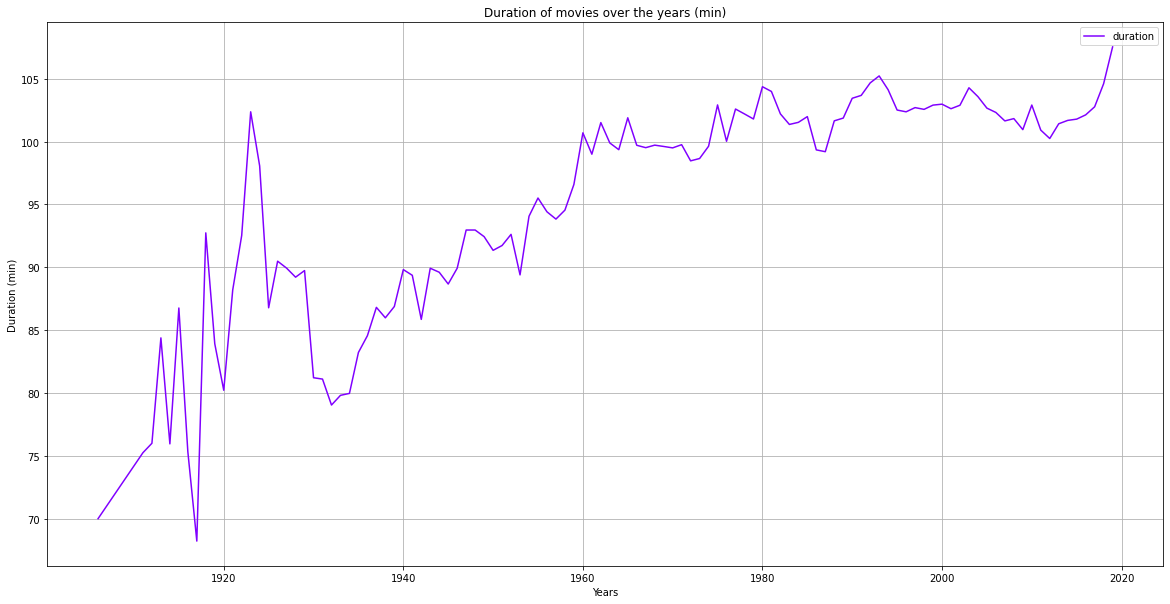

In [116]:
lenghts = movies.groupby('year')['duration'].mean()
lenghts.plot(
    kind='line',
    figsize=(20,10),
    title='Duration of movies over the years (min)',
    grid='y',
    legend=True,
    xlabel='Years',
    ylabel='Duration (min)',
    colormap='rainbow',
    linestyle='solid'
);


# Análise extra: top diretores com mais de 50 filmes feitos

In [114]:
directors_rating = pd.merge(left=movies,right=ratings,how='left',on='imdb_title_id')
count_ranking = directors_rating.groupby('director')['imdb_title_id'].count().sort_values(ascending=False).reset_index()
count_ranking.rename(columns={'imdb_title_id':'number of movies made'},inplace=True)
top_50_directos = count_ranking[count_ranking['number of movies made']>=50]
top_50_directos

,director,number of movies made
0,Michael Curtiz,86
1,Jesús Franco,85
2,Lloyd Bacon,73
3,William Beaudine,69
4,John Ford,67
5,Richard Thorpe,67
6,Lesley Selander,65
7,Gordon Douglas,64
8,Mervyn LeRoy,60
9,Takashi Miike,59


# Análise extra: top diretores com filmes bem avaliados (nota 8.5 média ou maior)

### Descobrindo a métida do número total de votos por filme

In [153]:
n_votes_mean= directors_rating['total_votes'].mean()

### Filtrando para pegar somente os filmes que tem um número de votos satisfatórios

In [154]:
directors_rating= directors_rating[directors_rating['total_votes']>=n_votes_mean]

In [166]:
mean_rating = directors_rating.groupby('director')['avg_vote'].mean().round(2).sort_values(ascending=False).reset_index()
top_votes_directos = mean_rating[mean_rating['avg_vote']>=8.5]
top_votes_directos

,director,avg_vote
0,"Tim Gagliardo, Donavon Warren",9.30
1,Amitabh Reza Chowdhury,9.20
2,"Ram, Amudhavan Karuppiah",9.20
3,Slobodan Sijan,8.95
4,Ertem Egilmez,8.93
5,"Dusan Kovacevic, Bozidar 'Bota' Nikolic",8.90
6,Sundar C.,8.80
7,Nesli Çölgeçen,8.70
8,Ram Kumar,8.70
9,"Gayatri, Pushkar",8.70


# Análise extra: filmes por país (século 21)

### split na coluna de paises para que fosse possível posteriomente dar um explode na coluna de paises e cada linha ser um país

In [207]:
movies['country'] = movies['country'].str.split(', ')
movies_country_expl = movies.explode('country')

In [217]:
movies_country_expl.pivot_table(
    index='year',
    columns='country',
    values='imdb_title_id',
    aggfunc='count',
    dropna=True,
    fill_value='-'
).loc['2000':,]

country,Afghanistan,Albania,Algeria,Andorra,Angola,Argentina,Armenia,Aruba,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Belarus,Belgium,Belize,Bermuda,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,British Virgin Islands,Brunei,Bulgaria,Burkina Faso,Burma,Cambodia,Cameroon,Canada,Cape Verde,Cayman Islands,Chad,Chile,China,Colombia,Costa Rica,Croatia,Cuba,Cyprus,Czech Republic,Czechoslovakia,Côte d'Ivoire,Denmark,Djibouti,Dominican Republic,East Germany,Ecuador,Egypt,El Salvador,Estonia,Ethiopia,Faroe Islands,Federal Republic of Yugoslavia,Fiji,Finland,France,Georgia,Germany,Ghana,Gibraltar,Greece,Greenland,Guadeloupe,Guatemala,Guinea,Guinea-Bissau,Haiti,Holy See (Vatican City State),Honduras,Hong Kong,Hungary,Iceland,India,Indonesia,Iran,Iraq,Ireland,Isle Of Man,Israel,Italy,Jamaica,Japan,Jordan,Kazakhstan,Kenya,Korea,Kosovo,Kuwait,Kyrgyzstan,Laos,Latvia,Lebanon,Lesotho,Liberia,Libya,Liechtenstein,Lithuania,Luxembourg,Macao,Malawi,Malaysia,Maldives,Mali,Malta,Martinique,Mauritania,Mexico,Moldova,Monaco,Mongolia,Montenegro,Morocco,Mozambique,Myanmar,Namibia,Nepal,Netherlands,Netherlands Antilles,New Caledonia,New Zealand,Nicaragua,Niger,Nigeria,North Korea,North Vietnam,Norway,Oman,Pakistan,Palestine,Panama,Papua New Guinea,Paraguay,Peru,Philippines,Poland,Portugal,Puerto Rico,Qatar,Republic of Macedonia,Reunion,Romania,Russia,Rwanda,Samoa,Saudi Arabia,Senegal,Serbia,Serbia and Montenegro,Singapore,Slovakia,Slovenia,Somalia,South Africa,South Korea,Soviet Union,Spain,Sri Lanka,Sudan,Suriname,Svalbard And Jan Mayen,Swaziland,Sweden,Switzerland,Syria,Taiwan,Tajikistan,Tanzania,Thailand,The Democratic Republic Of Congo,Trinidad and Tobago,Tunisia,Turkey,UK,USA,Uganda,Ukraine,United Arab Emirates,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Germany,Yemen,Yugoslavia,Zaire,Zambia,Zimbabwe
year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2000,-,-,1.0,-,-,18.0,-,-,26.0,6.0,-,-,-,1.0,-,19.0,-,-,-,-,1.0,-,15.0,-,-,1.0,1.0,-,-,-,88.0,-,-,-,4.0,15.0,3.0,-,2.0,3.0,-,15.0,-,1.0,29.0,-,-,-,-,4.0,-,1.0,-,-,5.0,-,14.0,165.0,1.0,123.0,-,-,14.0,-,-,-,-,-,1.0,-,-,36.0,11.0,6.0,92.0,1.0,18.0,-,15.0,-,5.0,56.0,-,71.0,-,-,-,-,-,-,-,-,3.0,-,-,-,-,-,2.0,6.0,-,-,-,-,-,1.0,1.0,-,13.0,-,-,-,-,2.0,-,-,-,-,16.0,-,-,4.0,-,-,-,-,-,16.0,-,1.0,-,-,-,-,2.0,6.0,17.0,12.0,-,-,-,-,2.0,17.0,-,-,-,-,-,-,2.0,3.0,2.0,-,6.0,27.0,-,64.0,1.0,-,-,-,-,36.0,15.0,-,8.0,-,-,4.0,-,-,3.0,10.0,124.0,498.0,-,1.0,-,1.0,-,-,1.0,1.0,-,-,-,-,-,-
2001,-,2.0,1.0,-,-,19.0,-,1.0,27.0,9.0,1.0,-,-,2.0,1.0,16.0,-,-,-,-,1.0,-,19.0,-,-,5.0,1.0,-,-,-,110.0,-,-,-,4.0,16.0,2.0,-,4.0,3.0,-,12.0,-,-,25.0,-,-,-,-,9.0,-,3.0,-,-,9.0,-,12.0,177.0,-,140.0,-,-,14.0,-,-,-,-,-,-,-,-,41.0,17.0,2.0,88.0,2.0,14.0,-,9.0,-,8.0,68.0,-,80.0,-,1.0,-,-,-,-,1.0,-,1.0,-,-,-,-,-,-,6.0,-,-,-,-,-,1.0,-,-,18.0,-,-,-,-,-,-,-,-,1.0,28.0,-,-,8.0,-,-,-,-,-,9.0,-,-,-,-,-,-,-,2.0,19.0,13.0,-,-,2.0,-,5.0,14.0,-,-,-,3.0,-,-,-,-,4.0,-,4.0,32.0,-,68.0,-,-,-,-,-,18.0,19.0,-,6.0,-,-,7.0,-,1.0,1.0,13.0,115.0,525.0,-,1.0,-,2.0,-,-,2.0,-,-,-,-,-,-,-
2002,-,-,2.0,-,-,27.0,-,2.0,25.0,5.0,-,-,-,1.0,-,19.0,-,-,-,-,-,-,19.0,-,-,3.0,-,-,-,-,112.0,-,-,1.0,4.0,16.0,3.0,-,2.0,-,-,10.0,-,-,25.0,-,-,-,-,8.0,-,2.0,-,-,8.0,-,14.0,189.0,-,144.0,-,-,6.0,-,-,-,-,-,-,-,-,35.0,16.0,3.0,106.0,3.0,16.0,1.0,10.0,-,6.0,61.0,1.0,64.0,1.0,-,-,-,-,-,-,-,-,-,-,-,-,-,1.0,11.0,-,-,1.0,-,-,-,-,1.0,22.0,1.0,-,-,-,1.0,-,-,-,-,30.0,-,-,4.0,-,-,-,-,-,12.0,-,1.0,3.0,-,-,-,-,4.0,23.0,14.0,-,-,-,-,7.0,22.0,-,-,-,1.0,-,-,2.0,2.0,5.0,-,3.0,51.0,-,79.0,-,-,-,-,-,23.0,13.0,-,7.0,1.0,-,8.0,-,-,1.0,11.0,129.0,515.0,-,2.0,2.0,1.0,-,-,-,1.0,-,-,-,-,-,-
2003,1.0,-,1.0,-,-,19.0,1.0,-,36.0,14.0,1.0,-,-,2.0,1.0,21.0,-,-,1.0,2.0,4.0,-,26.0,-,-,2.0,-,-,-,-,92.0,-,-,-,10.0,21.0,3.0,-,7.0,3.0,1.0,11.0,-,-,31.0,-,1.0,-,-,13.0,-,3.0,-,-,-,-,16.0,177.0,1.0,133.0,-,-,6.0,-,-,-,-,-,-,-,-,46.0,14.0,4.0,140.0,4.0,21.0,-,15.0,-,

### Ideias de análise

- Filmes mais lucrativos
- Avaliação por gênero, considerando um número x de filmes
- Paises mais lucrativos em relação a filmes por gênero
- Filmes mais bem avaliados pela crítica e pelos usuários (média entre as duas notas)
- Média de notas por filme por gênero por ano